# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzašším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **survived**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# 1️⃣Předzpracování dat

Importuju potřebné balíčky

In [1]:
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Nejprve načtěme data ze souboru a seznámíme se s nimi

In [2]:
data = pd.read_csv('data.csv')
data.drop_duplicates() #Duplikáty ihned odstraníme, aby už nepřekážely.
data.head(5)

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,"Wiltshire, England Niagara Falls, NY"
1,1,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S,NaN
2,2,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,NaN
3,3,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,NaN
4,4,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        802 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      233 non-null    object 
 11  embarked   998 non-null    object 
 12  home.dest  566 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


Nejprve odstraňme příznaky, které nepotřebujeme(tyto vlastnosti rozhodně nemají vliv na konečný výsledek). Pro nás je to: ID, name, ticket, home.dest

In [4]:
data = data.drop(['ID', 'name', 'ticket', 'home.dest'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   object 
 3   age       802 non-null    float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   fare      999 non-null    float64
 7   cabin     233 non-null    object 
 8   embarked  998 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


Chybějící hodnoty doplním na základě jiných hodnot v tabulce, takže nejprve rozdělíme data na podmnožiny,aby se předešlo úniku informací z testovací nebo validační množiny do trénovací množiny. 

Převeďme příznaky **sex** a **embarked** na numerický typ.Za tímto účelem ihned změňme chybějící hodnoty v příznaku embarked na ty nejběžnější (Můžeme to udělat, protože chybí pouze 2 hodnoty).

In [5]:
le_sex = LabelEncoder()
data['sex'] = le_sex.fit_transform(data['sex'])

most_common_embarked = data['embarked'].mode()[0] #The mode of a set of values is the value that appears most often
data['embarked'].fillna(most_common_embarked, inplace=True)
data['embarked'] = data['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

data['sex'].unique(), data['embarked'].unique()

(array([1, 0]), array([0, 2, 1], dtype=int64))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int32  
 3   age       802 non-null    float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   fare      999 non-null    float64
 7   cabin     233 non-null    object 
 8   embarked  1000 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 66.5+ KB


### Data si rozdělíme na trénovací, validační  a testovací část.

Nyní rozdělíme naše data na podmnožiny v poměru 60 % trénovací, 20 % validační a 20 % testovací.

In [7]:
Xdata = data.drop("survived", axis = 1) #Odstranění cílové proměnné pro trénovací data
ydata = data['survived']

rd_seed = 123
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed) 
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(600, 8)

(600,)

(400, 8)

(400,)

Nyní máme testovací data, rozdělme je na testovaci a validacni

In [8]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed) 
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(200, 8)

(200,)

(200, 8)

(200,)

### Chybějící hodnoty

Podívejme se, kde a jaké hodnoty nám chybí.

In [9]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age         198
sibsp         0
parch         0
fare          1
cabin       767
embarked      0
dtype: int64

Proveďme analýzu sloupců, zda v nich nejsou hodnoty, které by tam být neměly

In [10]:
categorical_columns = ['sex', 'embarked']
unique_values_categorical = {col: data[col].unique() for col in categorical_columns}

numerical_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare']
stats_numerical = data[numerical_columns].describe()

unique_values_categorical, stats_numerical

({'sex': array([1, 0]), 'embarked': array([0, 2, 1], dtype=int64)},
             pclass         age        sibsp       parch        fare
 count  1000.000000  802.000000  1000.000000  1000.00000  999.000000
 mean      2.288000   29.850686     0.496000     0.40200   34.264352
 std       0.840096   14.328743     1.024223     0.91719   53.315077
 min       1.000000    0.166700     0.000000     0.00000    0.000000
 25%       1.750000   21.000000     0.000000     0.00000    7.925000
 50%       3.000000   28.000000     0.000000     0.00000   14.458300
 75%       3.000000   39.000000     1.000000     0.00000   31.275000
 max       3.000000   80.000000     8.000000     9.00000  512.329200)

Jediné, co je podezřelé, je nulová cena, ale ta je zcela reálná.

Rozhodl jsem se nahradit chybějící hodnoty **age** mediánem.

In [11]:
age_median = Xtrain['age'].median()
Xtrain['age'].fillna(age_median, inplace=True)
Xtest['age'].fillna(age_median, inplace=True)
Xval['age'].fillna(age_median, inplace=True)

Xtrain['age'].isnull().sum(), Xtest['age'].isnull().sum(), Xval['age'].isnull().sum()

(0, 0, 0)

V **fare** nahradíme cenu průměrnou cenou pro tuto třídu

In [12]:
fare_mean = Xtrain.groupby('pclass')['fare'].mean()
Xtrain['fare'] = data.apply(lambda row: fare_mean[row['pclass']] if pd.isnull(row['fare']) else row['fare'], axis=1)
Xtest['fare'] = data.apply(lambda row: fare_mean[row['pclass']] if pd.isnull(row['fare']) else row['fare'], axis=1)
Xval['fare'] = data.apply(lambda row: fare_mean[row['pclass']] if pd.isnull(row['fare']) else row['fare'], axis=1)

Xtrain['fare'].isnull().sum(), Xtest['fare'].isnull().sum(), Xval['fare'].isnull().sum()

(0, 0, 0)

**Cabin** má hodně chybějících hodnot, zkusme analyzovat závislost kabiny na jiných příznacích.

In [13]:
Xtrain['cabin'].unique()

array(['C30', nan, 'E49', 'C23 C25 C27', 'C80', 'B37', 'F4', 'C123',
       'E67', 'D', 'B58 B60', 'C22 C26', 'G6', 'C53', 'D15', 'B38', 'B49',
       'E8', 'B96 B98', 'C62 C64', 'B69', 'D22', 'F2', 'C68', 'C125',
       'B77', 'B22', 'F G63', 'D7', 'C78', 'B57 B59 B63 B66', 'D35',
       'C91', 'C2', 'C89', 'E63', 'E46', 'D37', 'C32', 'E12', 'E25',
       'D17', 'C106', 'A7', 'E101', 'C90', 'E60', 'C83', 'D28', 'E58',
       'A23', 'B5', 'A24', 'D33', 'C148', 'C101', 'C97', 'B73', 'B42',
       'D50', 'A34', 'D46', 'C6', 'B28', 'D56', 'E39 E41', 'B71',
       'B51 B53 B55', 'B24', 'C111', 'D48', 'A26', 'B20', 'D20', 'C50',
       'D36', 'B18', 'E52', 'E10', 'C52', 'D38', 'B4', 'C86', 'C55 C57',
       'B10', 'E24', 'C116', 'C49', 'B41', 'D19', 'B30', 'C46', 'C65',
       'F E57', 'A18', 'A5', 'E50', 'B50', 'D10 D12', 'F E69', 'C31',
       'B78', 'C92', 'C51', 'E77', 'A6'], dtype=object)

Spojíme hodnoty podle prvního písmene

In [14]:
Xtrain['cabin_letter'] = Xtrain['cabin'].str[0]
Xtest['cabin_letter'] = Xtest['cabin'].str[0]
Xval['cabin_letter'] = Xval['cabin'].str[0]

Xtrain['cabin_letter'].unique()

array(['C', nan, 'E', 'B', 'F', 'D', 'G', 'A'], dtype=object)

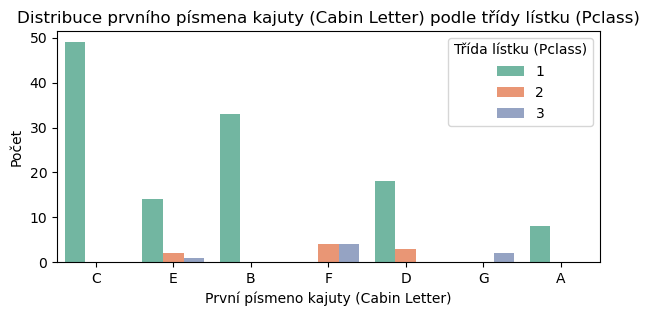

In [15]:
plt.figure(figsize=(7, 3))
sns.countplot(data=Xtrain, x='cabin_letter', hue='pclass', palette="Set2")
plt.title('Distribuce prvního písmena kajuty (Cabin Letter) podle třídy lístku (Pclass)')
plt.xlabel('První písmeno kajuty (Cabin Letter)')
plt.ylabel('Počet')
plt.legend(title='Třída lístku (Pclass)', loc='upper right')
plt.show()

Výsledek:
* Kajuty s písmenem A: Vyskytují se převážně v první třídě.
* Kajuty s písmenem B: Také se vyskytují hlavně v první třídě.
* Kajuty s písmenem C: Také se vyskytují hlavně v první třídě.
* Kajuty s písmenem D: Jsou rozloženy mezi první a druhou třídou. Převažuje první třída
* Kajuty s písmenem E: Jsou zastoupeny ve všech třídách, ale nejvíce v první třídě.
* Kajuty s písmenem F: Vyskytují se hlavně ve druhé a třetí třídě.
* Kajuty s písmenem G: Vyskytují se pouze ve třetí třídě.
* Kajuty s písmenem T: Vyskytují se pouze v první třídě, ale jsou velmi vzácné.

Na základě toho rozdělme chybějící hodnoty **cabin**.

In [16]:
def random_impute_cabin(row):
    if pd.isnull(row['cabin_letter']):
        if row['pclass'] == 1:
            return np.random.choice(['A', 'B', 'C', 'D', 'E', 'T'], p=[0.20, 0.20, 0.20, 0.15, 0.15, 0.10])
        elif row['pclass'] == 2:
            return np.random.choice(['D', 'E', 'F'], p=[0.4, 0.4, 0.2])
        else:
            return np.random.choice(['E', 'F', 'G'], p=[0.3, 0.4, 0.3])
    else:
        return row['cabin_letter']

Xtrain['cabin_letter'] = Xtrain.apply(random_impute_cabin, axis=1)
Xtest['cabin_letter'] = Xtest.apply(random_impute_cabin, axis=1)
Xval['cabin_letter'] = Xval.apply(random_impute_cabin, axis=1)

Xtrain['cabin_letter'].isnull().sum(), Xtest['cabin_letter'].isnull().sum(), Xval['cabin_letter'].isnull().sum()

(0, 0, 0)

Odhadněme konečné rozdělení:

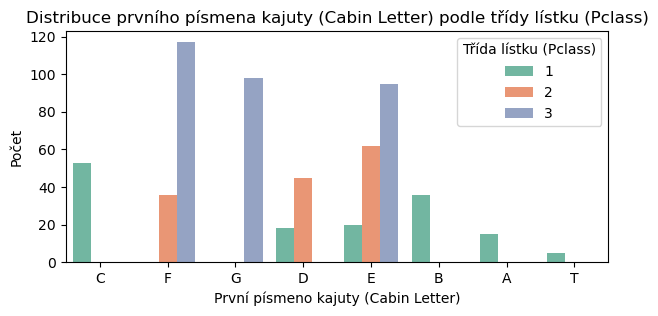

In [17]:
plt.figure(figsize=(7, 3))
sns.countplot(data=Xtrain, x='cabin_letter', hue='pclass', palette="Set2")
plt.title('Distribuce prvního písmena kajuty (Cabin Letter) podle třídy lístku (Pclass)')
plt.xlabel('První písmeno kajuty (Cabin Letter)')
plt.ylabel('Počet')
plt.legend(title='Třída lístku (Pclass)', loc='upper right')
plt.show()

Konečné rozložení vypadá realisticky.

Abychom se vyhnuli záměně s příznakem **cabin** (navíc nám konkrétní číslo cabin neposkytuje mnoho dalších informací), ponecháme příznak cabin_letter, ale přejmenujeme jej na **cabin_class** a příznak **cabin** odstranime.

In [18]:
Xtrain.rename(columns={'cabin_letter': 'cabin_class'}, inplace=True)
Xtrain.drop('cabin', axis=1, inplace=True)
Xtest.rename(columns={'cabin_letter': 'cabin_class'}, inplace=True)
Xtest.drop('cabin', axis=1, inplace=True)
Xval.rename(columns={'cabin_letter': 'cabin_class'}, inplace=True)
Xval.drop('cabin', axis=1, inplace=True)

Xtrain.isnull().sum(), Xtest.isnull().sum(), Xval.isnull().sum()

(pclass         0
 sex            0
 age            0
 sibsp          0
 parch          0
 fare           0
 embarked       0
 cabin_class    0
 dtype: int64,
 pclass         0
 sex            0
 age            0
 sibsp          0
 parch          0
 fare           0
 embarked       0
 cabin_class    0
 dtype: int64,
 pclass         0
 sex            0
 age            0
 sibsp          0
 parch          0
 fare           0
 embarked       0
 cabin_class    0
 dtype: int64)

Tím jsme skončili s chybějícími hodnotami ✅

Převeďme pouze příznak cabin_class na numerický typ.

In [19]:
le_cabin_class = LabelEncoder()

le_cabin_class.fit(Xtrain['cabin_class'].unique())

Xtrain['cabin_class'] = le_cabin_class.transform(Xtrain['cabin_class'])
Xtest['cabin_class'] = le_cabin_class.transform(Xtest['cabin_class'])
Xval['cabin_class'] = le_cabin_class.transform(Xval['cabin_class'])

Výsledek po předzpracování dat:

In [20]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 429 to 510
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       600 non-null    int64  
 1   sex          600 non-null    int32  
 2   age          600 non-null    float64
 3   sibsp        600 non-null    int64  
 4   parch        600 non-null    int64  
 5   fare         600 non-null    float64
 6   embarked     600 non-null    int64  
 7   cabin_class  600 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 37.5 KB


# 2️⃣ Rozhodovací strom

### Vhodnost daného modelu pro daný typ úlohy:
**Výběr Důležitých Informací**: Rozhodovací stromy jsou skvělé, protože nám pomáhají pochopit, které informace (jako věk pasažéra, třída lístku, atd.) jsou opravdu důležité pro to, aby model mohl předpovědět, kdo přežil potopení Titanicu. Když ještě nevíme, na co se zaměřit, strom nám ukáže, co je nejvíce důležité.

**Není Potřeba Složitého Předzpracování**: U rozhodovacích stromů nemusíme strávit hodně času přípravou dat(například nemusíme se starat o škálování číselných proměnných), protože strom pracuje s těmito hodnotami přímo.

**Pozor na Přeučení**: Je potřeba být opatrný, aby strom "nevyrostl" příliš komplikovaný a nepřizpůsobil se příliš detailům v trénovacích datech. Pokud je strom příliš složitý, může mít problémy předpovídat, co by se stalo s novými lidmi, kteří nebyli v trénovacích datech.Proto vzhledem k této informaci budeme trénovat náš strom pomocí nejvhodnějších hyperparametrů pro dosažení nejvyšší přesnosti modelu.



### Implementace
Použiji rozhodovací strom implementovaný v sklearn

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 1)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Naučím model na datech pomocí metody .fit()

In [22]:
clf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=1)

Nyní se pokusím co nejlépe nastavit hyperparametry pro strom (max_depth a criterion) pomocí ParameterGrid

In [23]:
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid

Vypočítejme přesnost pro hloubky od 1 do 30 pro dvě kritéria: "entropy" a "gini".

In [24]:
param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)
val_acc = []
train_acc = []
for params in param_comb:
    clf = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    clf.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval)))
    

Zobrazme si graf výsledků, kde si všimneme nejlepšího výsledku pro validacni mnoziny, který nás zajímá

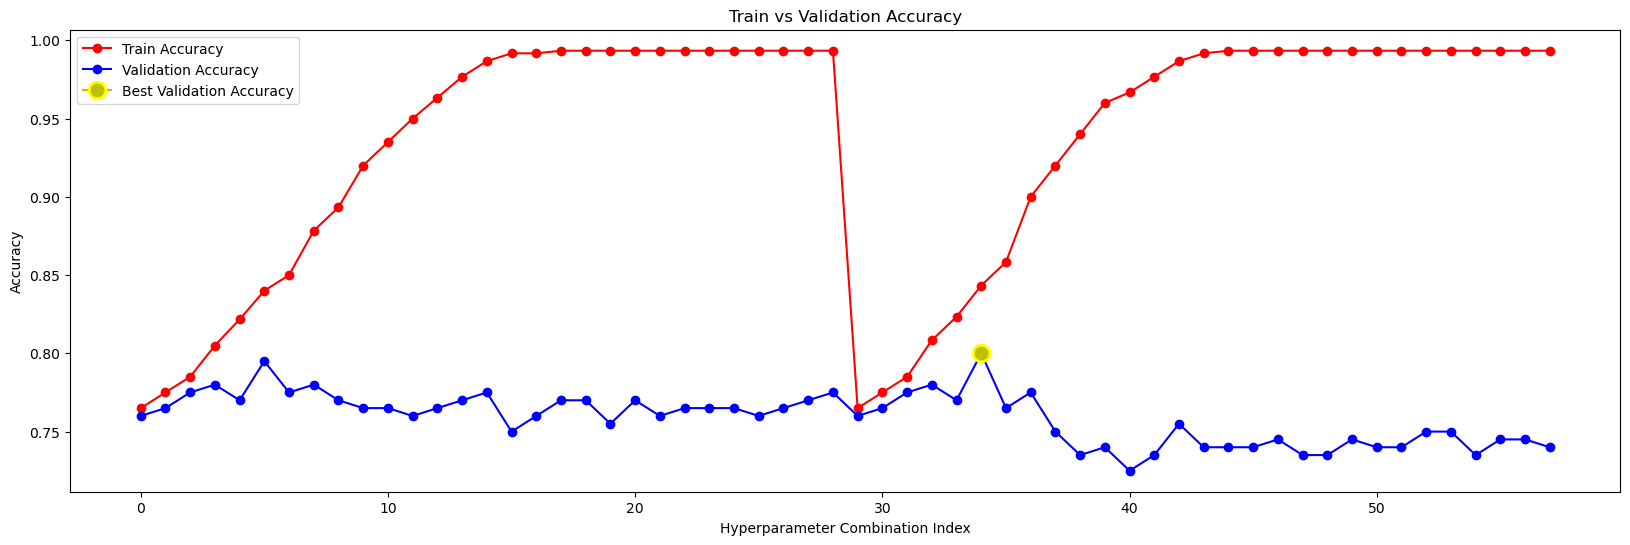

In [25]:
plt.figure(figsize=(20,6))
plt.plot(train_acc, 'or-', label='Train Accuracy')
plt.plot(val_acc, 'ob-', label='Validation Accuracy')

# Označení nejlepšího výsledku na validační množině
best_val_index = np.argmax(val_acc)
plt.plot(best_val_index, val_acc[best_val_index], 'oy-', label='Best Validation Accuracy', markersize=12, markeredgewidth=2, markeredgecolor='yellow')

plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()


Vypišme výsledek samostatně

In [26]:
best_params = param_comb[np.argmax(val_acc)]
best_params

{'max_depth': 6, 'criterion': 'gini'}

Nyní naučte náš strom pomocí nejlepších nalezených hyperparametrů a podívejte se na přesnost všech podmnožin.

In [27]:
clf = DecisionTreeClassifier(**best_params)
clf.fit(Xtrain, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, clf.predict(Xtest))))

accuracy score (train): 0.843333
accuracy score (validation): 0.800000
accuracy score (test): 0.790000


Z výsledků je vidět, že model je schopen predikovat výsledek s velkou přesností.

Máme mírný pokles přesnosti, když model aplikujeme na validační a testovací množinu (cca 79-78%), což je běžné a naznačuje, že model není přetrénovaný (overfitted) na trénovací data a je schopen aplikovat naučené vzorce na neviděná data.

Rozhodovací strom pro tuto úlohu funguje poměrně dobře, ale pravděpodobně je stále co zlepšovat, aby bylo dosaženo ještě vyšší přesnosti a schopnosti generalizace.

# 3️⃣ Metoda nejbližších sousedů

### Vhodnost daného modelu pro daný typ úlohy:

**Příznaky a Rozměrnost**: Naše data nejsou příliš velká a mají relativně malý počet příznaků, což znamená, že bychom neměli mít problémy s prokletím dimenzionality, které KNN obvykle trápí.

**Výběr K**: Budeme muset najít správné k pro naše data. Pokud je k příliš malé, můžeme se přizpůsobit šumu, zatímco velké k by mohlo příliš zobecňovat.

**Výpočetní Náročnost**: KNN může někdy trvat trochu déle, když hledá nejbližší sousedy v datech, ale naši seznam pasažérů Titanicu není tak dlouhý, aby to byl opravdu problém. Takže pro náš projekt to vypadá, že KNN by mohlo být docela rychlé a efektivní při predikci.

### Implementace

In [28]:
import warnings #smazání některých Future Warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Nejprve musíme připravit podmnožiny dat pro KNN. Za tímto účelem provedeme **min max normalizaci** pomocí nástroje sklearn

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(Xtrain)

# Transformace podmnožin
Xtrain_scaled = scaler.transform(Xtrain)
Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)

Nyní natrénujme model taky pomocí sklearn

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain, ytrain)
print(f"Validation accuracy: {metrics.accuracy_score(yval, knn.predict(Xval)):0.4f}")

Validation accuracy: 0.6700


Nyní upravíme hyperparametry tak, aby byl model co nejpřesnější. Znovu použijeme ParameterGrid pro ladění n_neighbors,
weights, metric

In [31]:
val_acc = []
train_acc = []

param_grid = {
    'n_neighbors': range(1, 21),  # testování 1 až 20 sousedů
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_comb = ParameterGrid(param_grid)
for params in param_comb:
    knn = KNeighborsClassifier(**params)
    knn.fit(Xtrain_scaled, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, knn.predict(Xtrain_scaled)))
    val_acc.append(metrics.accuracy_score(yval, knn.predict(Xval_scaled)))

# Nalezení kombinace hyperparametrů s nejlepší validační přesností
best_val_index = np.argmax(val_acc)
best_params = param_comb[best_val_index]

print(f"Best hyperparameters: {best_params}")
print(f"Best training accuracy: {train_acc[best_val_index]:.4f}")
print(f"Best validation accuracy: {val_acc[best_val_index]:.4f}")

Best hyperparameters: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'euclidean'}
Best training accuracy: 0.7983
Best validation accuracy: 0.8100


Podívejme se na výsledky v grafu (pro každou dvojici weights a metric)

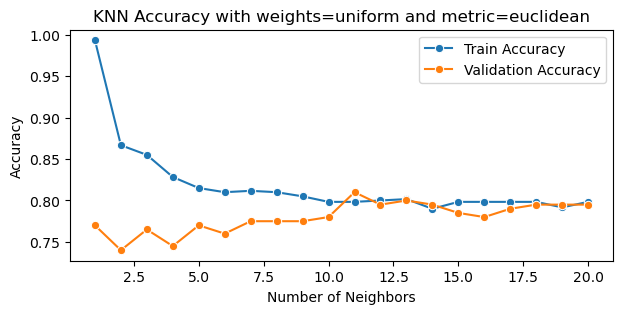

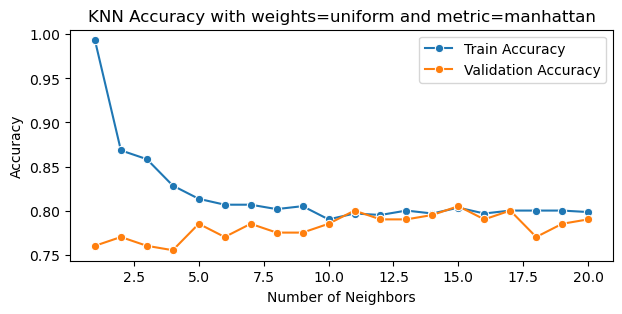

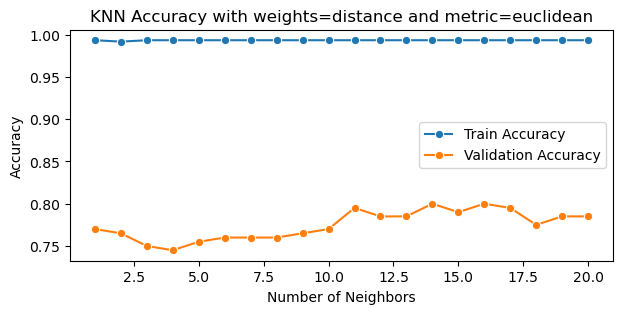

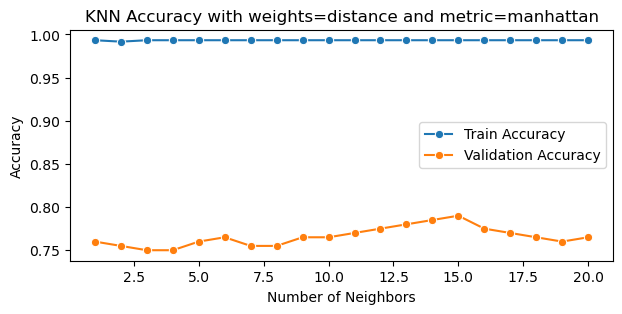

In [32]:
results_df = pd.DataFrame({
    'n_neighbors': [params['n_neighbors'] for params in param_comb],
    'weights': [params['weights'] for params in param_comb],
    'metric': [params['metric'] for params in param_comb],
    'train_acc': train_acc,
    'val_acc': val_acc
})

# Vytvoříme grafy pro každou kombinaci hyperparametrů
for weight in results_df['weights'].unique():
    for metric in results_df['metric'].unique():
        subset = results_df[(results_df['weights'] == weight) & (results_df['metric'] == metric)]
        
        plt.figure(figsize=(7, 3))
        sns.lineplot(data=subset, x='n_neighbors', y='train_acc', label='Train Accuracy', marker='o')
        sns.lineplot(data=subset, x='n_neighbors', y='val_acc', label='Validation Accuracy', marker='o')
        
        plt.title(f'KNN Accuracy with weights={weight} and metric={metric}')
        plt.xlabel('Number of Neighbors')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

In [33]:
best_params = param_comb[best_val_index]
knn = KNeighborsClassifier(**best_params)
knn.fit(Xtrain_scaled, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain_scaled))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, knn.predict(Xval_scaled))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest_scaled))))

accuracy score (train): 0.798333
accuracy score (validation): 0.810000
accuracy score (test): 0.795000


Tyto výsledky naznačují, že model je poměrně dobře vyvážený, tedy se mu daří dosahovat srovnatelné přesnosti na neviděných datech, což je pozitivní známka dobré generalizace.

Přesnost přes 80% na validačních a testovacích sadách ukazuje, že model má dobrý výkon a může být považován za úspěšný při predikci přežití na Titanicu. Přestože je přesnost na trénovací sadě o něco nižší než na validační a testovací sadě, rozdíl není velký, což je dobré, protože to znamená, že model není přetrénovaný.

Celkově lze říci, že KNN model s vybranými hyperparametry se zdá být vhodný pro úlohu predikce přežití na Titanicu a poskytuje dobré výsledky při klasifikaci.

# 4️⃣ Výpočet F1 skóre, nakreslení ROC křivky a určení AUC

Začněme výpočtem **F1 skóre** pro oba modely pomocí sklearn

In [34]:
from sklearn.metrics import f1_score

y_pred_clf = clf.predict(Xval)  
f1_clf = f1_score(yval, y_pred_clf)  

y_pred_knn = knn.predict(Xval_scaled)
f1_knn = f1_score(yval, y_pred_knn)  

print(f"F1 skóre pro Decision Tree: {f1_clf}")
print(f"F1 skóre pro KNN: {f1_knn}")

F1 skóre pro Decision Tree: 0.7500000000000001
F1 skóre pro KNN: 0.7466666666666666


Výsledky ukazují, že F1 skóre pro model rozhodovacího stromu (Decision Tree) je 0.75 a pro model KNN je 0.7712. To znamená, že oba modely mají poměrně dobrý výkon, ale **model KNN je trochu lepší**

Nyní vykreslíme **ROC křivku**

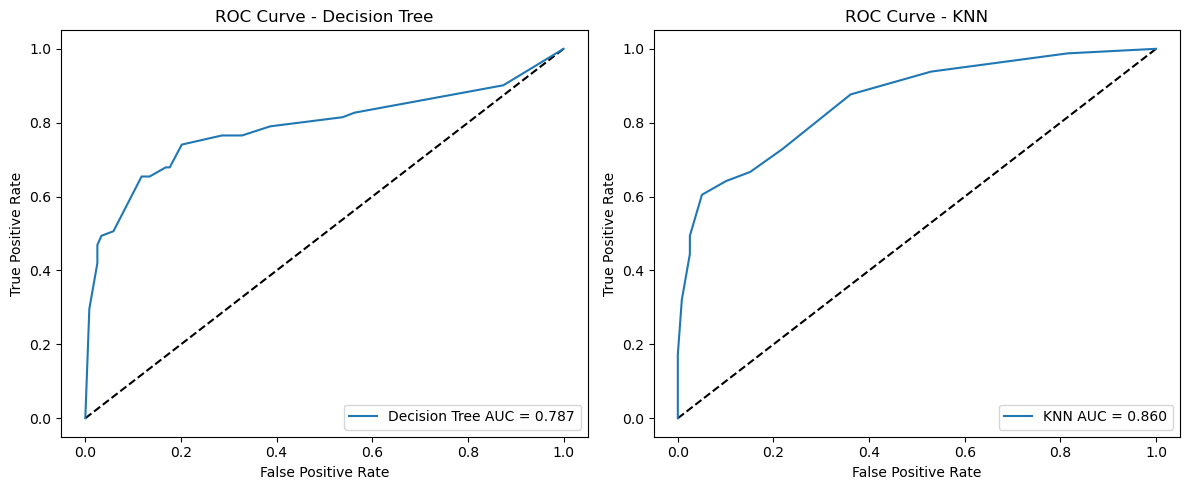

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# Výpočet pravděpodobností predikcí pro Decision Tree
y_pred_proba_tree = clf.predict_proba(Xtest)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(ytest, y_pred_proba_tree)
auc_tree = roc_auc_score(ytest, y_pred_proba_tree)

# Výpočet pravděpodobností predikcí pro KNN
y_pred_proba_knn = knn.predict_proba(Xtest_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(ytest, y_pred_proba_knn)
auc_knn = roc_auc_score(ytest, y_pred_proba_knn)

plt.figure(figsize=(12, 5))

# Graf pro Decision Tree
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree AUC = {auc_tree:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')

# Graf pro KNN
plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label=f'KNN AUC = {auc_knn:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

ROC křivka ukazuje, že oba modely mají lepší výkon než náhodný hádání (což by bylo znázorněno čarou diagonálně od levého dolního rohu do pravého horního). Vyšší AUC skóre KNN modelu může znamenat, že má lepší celkovou schopnost rozlišovat mezi pozitivními a negativními třídami v různých prahových hodnotách.

**Určení AUC**

In [36]:
from sklearn.metrics import roc_auc_score

y_pred_proba_clf = clf.predict_proba(Xtest)[:, 1]
auc_clf = roc_auc_score(ytest, y_pred_proba_clf)


y_pred_proba_knn = knn.predict_proba(Xtest_scaled)[:, 1]
auc_knn = roc_auc_score(ytest, y_pred_proba_knn)

print(f"AUC pro Decision Tree: {auc_clf:.4f}")
print(f"AUC pro KNN: {auc_knn:.4f}")

AUC pro Decision Tree: 0.7869
AUC pro KNN: 0.8597


Hodnoty AUC ukazují, že oba modely mají silnou schopnost odlišit mezi třídami přežití a ne-přežití. Vysoké skóre AUC, zejména pro KNN model, naznačuje, že tento model je velmi efektivní v predikci správných tříd, s dobrou rovnováhou mezi citlivostí a specificitou.

#### Výběr modelu a odhad presnosti

Na základě dosažených výsledků, KNN nám vychází lepší než rozhodovací strom(Má vyšší přesnost na validačních datech, vyšší F1 skore, vyšší AUC). S ohledem na jeho přesnost na testovací sadě lze očekávat, že by na nových, neviděných datech mohl dosáhnout podobné přesnosti okolo 80%

# 5️⃣ Evaluation

In [37]:
evaluation_data = pd.read_csv('evaluation.csv')

Abychom mohli náš model KNN použít na nový dataset, musíme jej uvést do podobnosti s Xtrain_scaled

Odstranění nepotřebných sloupců:

In [38]:
evaluation_ids = evaluation_data['ID'] #uložení ID pro result.csv

evaluation_data = evaluation_data.drop(['ID', 'name', 'ticket', 'home.dest'], axis=1)
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    309 non-null    int64  
 1   sex       309 non-null    object 
 2   age       244 non-null    float64
 3   sibsp     309 non-null    int64  
 4   parch     309 non-null    int64  
 5   fare      309 non-null    float64
 6   cabin     62 non-null     object 
 7   embarked  309 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 19.4+ KB


Zpracování chybějících hodnot(zkopírováno shora):

In [39]:
evaluation_data['sex'] = le_sex.fit_transform(evaluation_data['sex'])
evaluation_data['embarked'].fillna(most_common_embarked, inplace=True)
evaluation_data['embarked'] = evaluation_data['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
evaluation_data['age'].fillna(age_median, inplace=True)
evaluation_data['fare'] = data.apply(lambda row: fare_mean[row['pclass']] if pd.isnull(row['fare']) else row['fare'], axis=1)
evaluation_data['cabin_letter'] = evaluation_data['cabin'].str[0]
evaluation_data['cabin_letter'] = evaluation_data.apply(random_impute_cabin, axis=1)
evaluation_data.rename(columns={'cabin_letter': 'cabin_class'}, inplace=True)
evaluation_data.drop('cabin', axis=1, inplace=True)
evaluation_data['cabin_class'] = le_cabin_class.transform(evaluation_data['cabin_class'])

In [40]:
evaluation_data.info(), Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       309 non-null    int64  
 1   sex          309 non-null    int32  
 2   age          309 non-null    float64
 3   sibsp        309 non-null    int64  
 4   parch        309 non-null    int64  
 5   fare         309 non-null    float64
 6   embarked     309 non-null    int64  
 7   cabin_class  309 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 17.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 429 to 510
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       600 non-null    int64  
 1   sex          600 non-null    int32  
 2   age          600 non-null    float64
 3   sibsp        600 non-null    int64  
 4   parch        600 non-null    int64  
 5   fare      

(None, None)

Vypadá to stejně, nyní aplikujme min max normalizaci

In [41]:
evaluation_data_scaled = scaler.transform(evaluation_data)

Nyní je evaluation_data_scaled zcela připraven pro aplikaci modelu.

In [42]:
predicted_survived = knn.predict(evaluation_data_scaled)

results_df = pd.DataFrame({
    'ID': evaluation_ids,
    'survived': predicted_survived
})

#uložení výsledků do souboru CSV
results_df.to_csv("results.csv", index=False)

Výsledek je uložen do souboru results.csv